This is a work in progress work for the Google Data Analysis Professional Certificate Course

In [3]:

install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
library(tidyverse) 
library(ggplot2) 
library(lubridate) 
library(skimr) 
library(janitor) 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timechange’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [23]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [26]:
sleep_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv") %>%
    mutate(SleepDay=format(as.Date(SleepDay,format = '%m/%d/%Y'),"%m/%d/%Y"))
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,04/12/2016,1,327,346
2,1503960366,04/13/2016,2,384,407
3,1503960366,04/15/2016,1,412,442
4,1503960366,04/16/2016,2,340,367
5,1503960366,04/17/2016,1,700,712
6,1503960366,04/19/2016,1,304,320


In [27]:
new_df <- daily_activity %>%
    mutate(ActivityDate=format(as.Date(ActivityDate,format = '%m/%d/%Y'),"%m/%d/%Y"))
head(new_df)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,04/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,04/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,04/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [28]:
final_df <- merge(new_df, sleep_day, by.x=c("Id","ActivityDate"),by.y=c("Id","SleepDay"))
head(final_df)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,04/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,04/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,04/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,04/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,04/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320



library(tidyverse) 
library(ggplot2) 

daylySteps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")

## Summaries of the data ##

In [8]:
skim_without_charts(final_df)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<lgl>,<lgl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityDate,0,NaN,NA,NA,0,0,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
3,numeric,TotalSteps,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
4,numeric,TotalDistance,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
5,numeric,TrackerDistance,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
6,numeric,LoggedActivitiesDistance,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
7,numeric,VeryActiveDistance,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
8,numeric,ModeratelyActiveDistance,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA
9,numeric,LightActiveDistance,0,NaN,NA,NA,NA,NA,NA,NaN,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values  
Name                       final_df
Number of rows             0       
Number of columns          18      
_______________________            
Column type frequency:             
  character                1       
  numeric                  17      
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityDate          0           NaN NA  NA      0        0          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate mean sd p0 p25 p50 p75 p100
 1 Id                               0           NaN  NaN NA NA  NA  NA  NA   NA
 2 TotalSteps                       0           NaN  NaN NA NA  NA  NA  NA   NA
 3 TotalDistance                    0          

In [29]:
glimpse(final_df)

Rows: 413
Columns: 18
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "04/12/2016", "04/13/2016", "04/15/2016", "04…
$ TotalSteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ FairlyActiveMinutes      <int> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ LightlyActiveMin

In [30]:
summary(final_df)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:413         Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   Class :character   1st Qu.: 5206   1st Qu.: 3.600  
 Median :4.703e+09   Mode  :character   Median : 8925   Median : 6.290  
 Mean   :5.001e+09                      Mean   : 8541   Mean   : 6.039  
 3rd Qu.:6.962e+09                      3rd Qu.:11393   3rd Qu.: 8.030  
 Max.   :8.792e+09                      Max.   :22770   Max.   :17.540  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.010   Min.   :0.0000           Min.   : 0.00     
 1st Qu.: 3.600   1st Qu.:0.0000           1st Qu.: 0.00     
 Median : 6.290   Median :0.0000           Median : 0.57     
 Mean   : 6.034   Mean   :0.1131           Mean   : 1.45     
 3rd Qu.: 8.020   3rd Qu.:0.0000           3rd Qu.: 2.37     
 Max.   :17.540   Max.   :4.0817           Max.   :12.54     
 ModeratelyActiveDistance LightActiveDistance Sedentary

# Description of main columns used in this analysis # 
* ActivityDate:             Date value in mm/dd/yyyy format.
* TotalSteps:               Total number of steps taken.
* TotalDistance:            Total kilometers tracked. 
* TrackerDistance:          Total kilometers tracked by Fitbit device.
* LoggedActivitiesDistance: Total kilometers from logged activities. 
* VeryActiveDistance:       Kilometers travelled during very active activity.
* ModeratelyActiveDistance: Kilometers travelled during moderate activity.
* LightActiveDistance:      Kilometers travelled during light activity.
* SedentaryActiveDistance:  Kilometers travelled during sedentary activity.
* VeryActiveMinutes:        Total minutes spent in very active activity.
* FairlyActiveMinutes:      Total minutes spent in moderate activity.
* LightlyActiveMinutes:     Total minutes spent in light activity.
* SedentaryMinutes:         Total minutes spent in sedentary activity.
* Calories:                 Total estimated energy expenditure (in kilocalories).
* TotalSleepRecords:        Number of recorded sleep periods for that day. Includes naps > 60min.
* TotalMinutesAsleep:       Total number of minutes classified as being “asleep”.
* TotalTimeInBed:           Total minutes spent in bed, including asleep, restless, and awake, during a defined sleep record.

# Checking for identical columns # 

In [31]:
identical(final_df[['TotalDistance']],final_df[['TrackerDistance']])

[1] FALSE

In [32]:
identical(final_df[['LoggedActivitiesDistance']],final_df[['TrackerDistance']])


[1] FALSE

In [33]:
identical(final_df[['LoggedActivitiesDistance']],final_df[['TotalDistance']])

[1] FALSE

# Data Cleaning # 

In [34]:
final_df <- clean_names(final_df) 
head(final_df)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,04/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,04/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,04/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,04/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,04/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


# Analysis # 

In [35]:
lower_than_seven_hours <- final_df  %>% drop_na() %>% filter(total_minutes_asleep < 420)
greater_than_seven_hours <- final_df  %>% drop_na() %>% filter(total_minutes_asleep >= 420)

In [36]:
summary(lower_than_seven_hours)



       id            activity_date       total_steps    total_distance  
 Min.   :1.504e+09   Length:182         Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   Class :character   1st Qu.: 6553   1st Qu.: 4.582  
 Median :4.445e+09   Mode  :character   Median : 9784   Median : 6.970  
 Mean   :4.806e+09                      Mean   : 9380   Mean   : 6.594  
 3rd Qu.:5.577e+09                      3rd Qu.:12386   3rd Qu.: 8.602  
 Max.   :8.792e+09                      Max.   :22359   Max.   :17.190  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.010   Min.   :0.0000             Min.   : 0.000      
 1st Qu.: 4.582   1st Qu.:0.0000             1st Qu.: 0.000      
 Median : 6.970   Median :0.0000             Median : 1.240      
 Mean   : 6.593   Mean   :0.1815             Mean   : 1.723      
 3rd Qu.: 8.602   3rd Qu.:0.0000             3rd Qu.: 2.790      
 Max.   :17.190   Max.   :2.7852             Max.   :12.540      
 moderately_active_distance

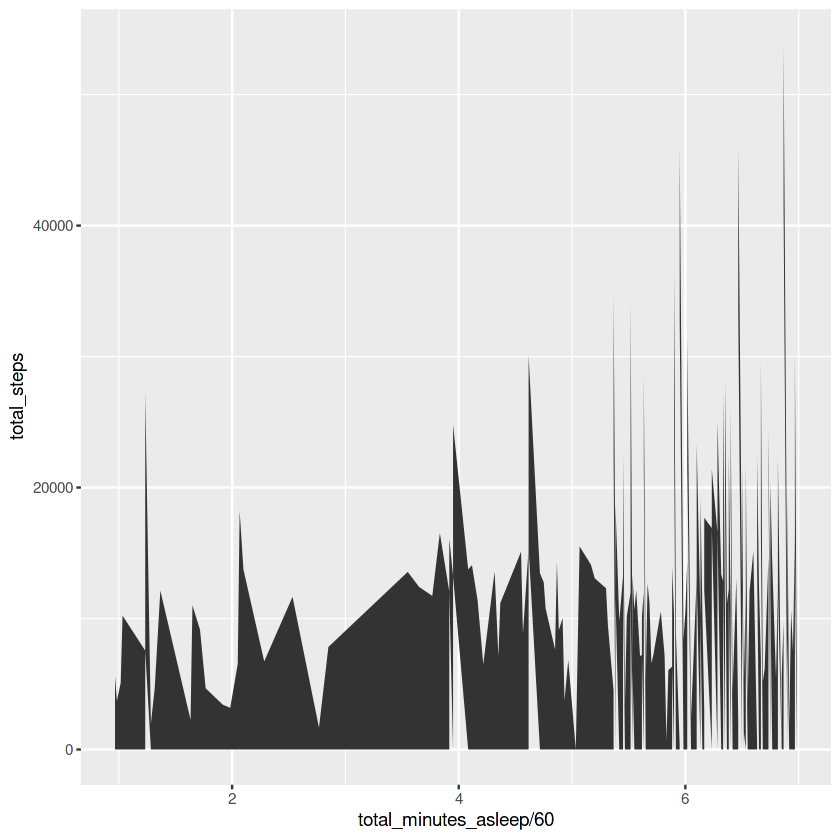

In [37]:
ggplot(data = lower_than_seven_hours) + geom_area(mapping = aes(x = total_minutes_asleep/60, y = total_steps))

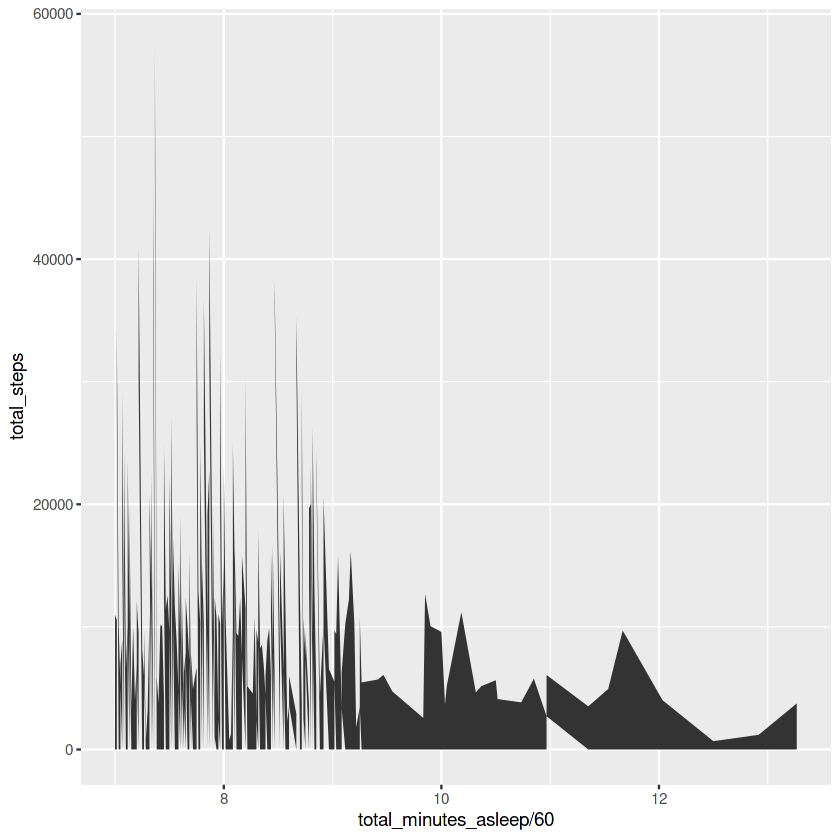

In [38]:
ggplot(data = greater_than_seven_hours) + geom_area(mapping = aes(x = total_minutes_asleep/60, y = total_steps))

### There is a tendency of doing less steps in people that sleeps more than 9 hours

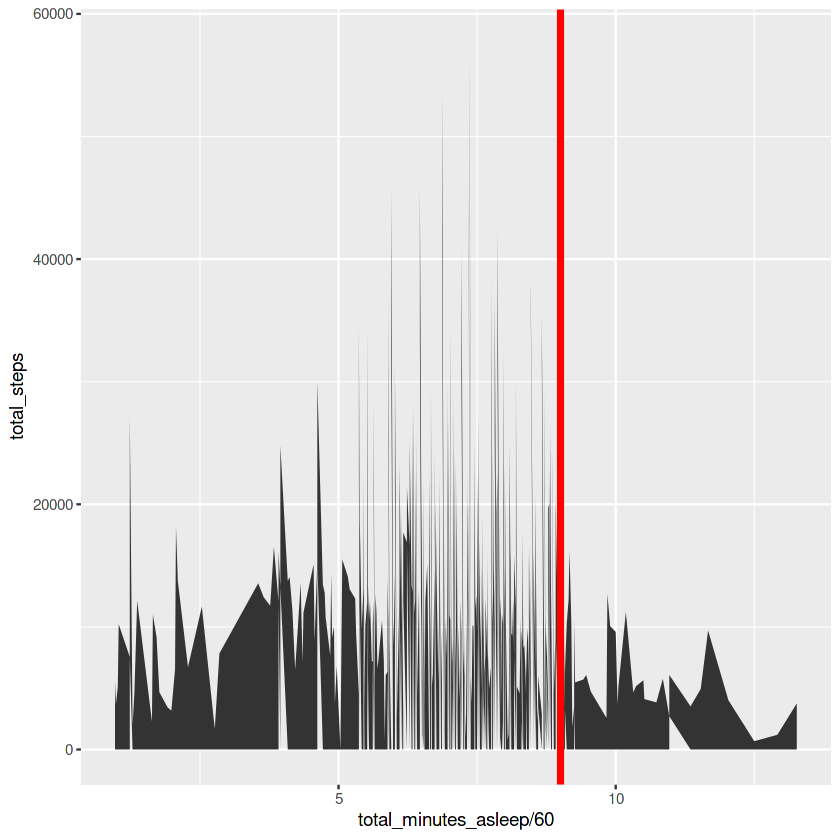

In [39]:

ggplot(data = final_df) + geom_area(mapping = aes(x = total_minutes_asleep/60, y = total_steps)) + geom_vline(xintercept = 9, 
                color = "red", size=1.5)

### There is a positive relation beetween very active minutes and calories 

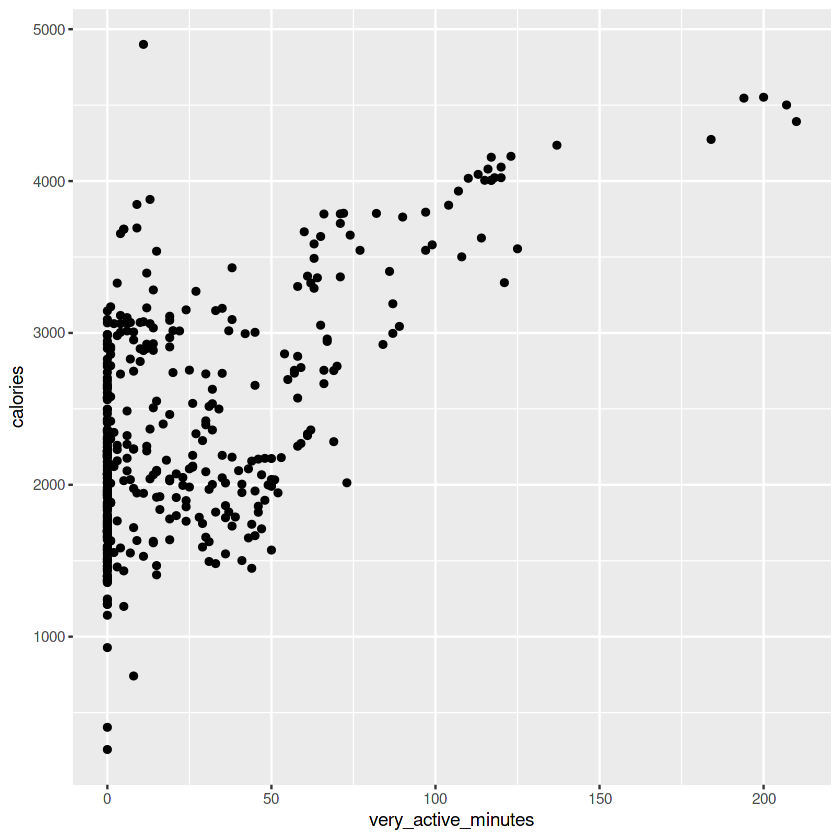

In [40]:

ggplot(data = final_df) + geom_point(mapping = aes(x = very_active_minutes , y = calories))



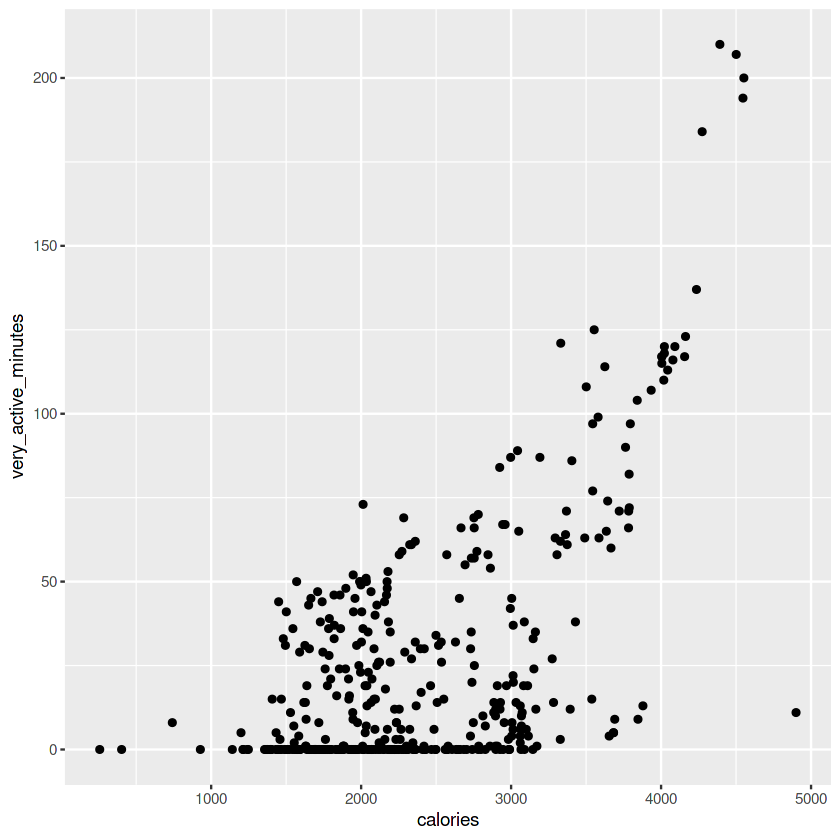

In [41]:
ggplot(data = final_df) + geom_point(mapping = aes(x = calories , y = very_active_minutes))

### But there isn't a clear relationship between active distance and calories

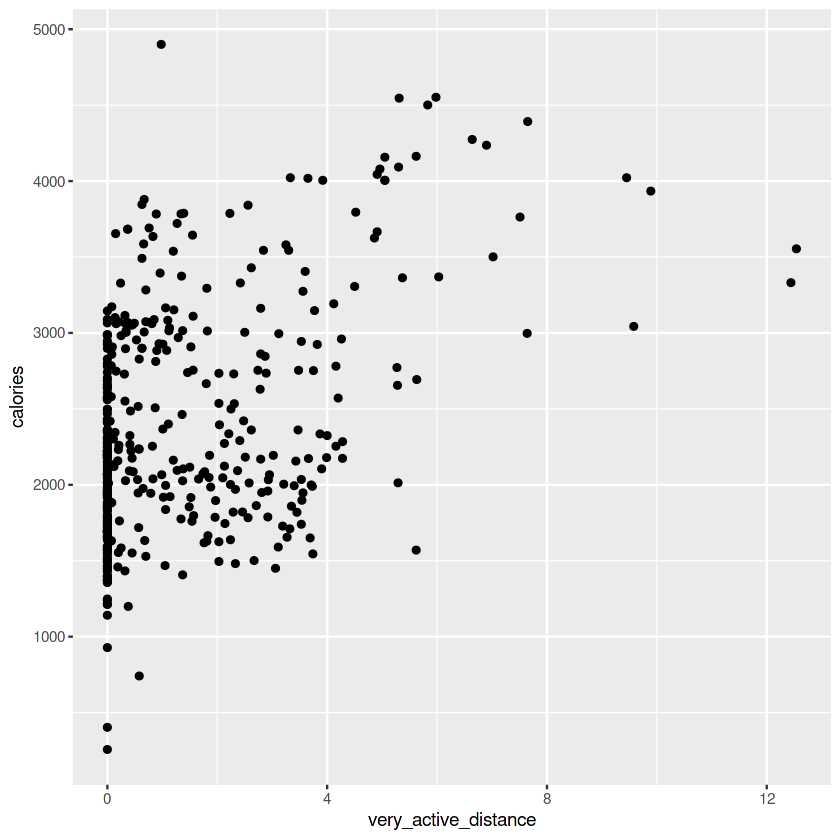

In [42]:

ggplot(data = final_df) + geom_point(mapping = aes(x = very_active_distance , y = calories))

### Other lectures

total_minutes_asleep,hours_in_bed,hours_asleep,difference_in_minutes
<int>,<dbl>,<dbl>,<dbl>
58,1.016667,0.9666667,3.0
59,1.083333,0.9833333,6.0
61,1.150000,1.0166667,8.0
62,1.083333,1.0333333,3.0
74,1.275000,1.2333333,2.5
77,1.283333,1.2833333,0.0


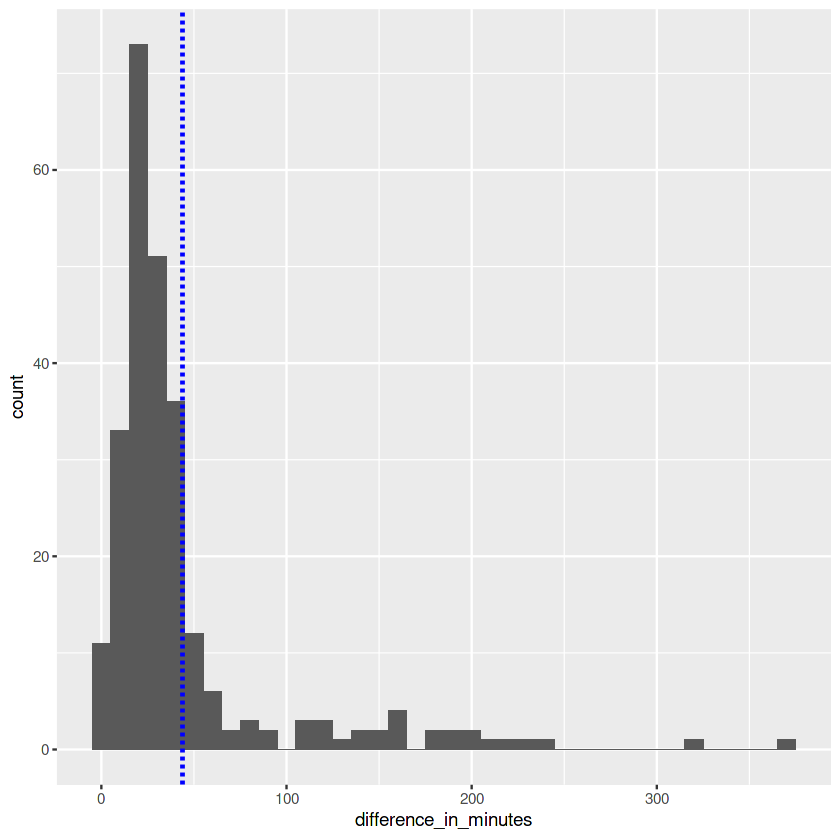

In [43]:
#There is an average of 50 minutes of difference between time asleep and time in bed
data_by_id <- final_df  %>% group_by(total_minutes_asleep) %>% drop_na() %>% summarize(hours_in_bed = mean(total_time_in_bed/60), hours_asleep = mean(total_minutes_asleep/60),difference_in_minutes = (hours_in_bed*60)-(hours_asleep*60))
head(data_by_id)

ggplot(data_by_id, aes(x=difference_in_minutes)) + geom_histogram(binwidth=10) + geom_vline(aes(xintercept=mean(difference_in_minutes)),
            color="blue", linetype="dashed", size=1)